In [1]:
import numpy as np
import random
from random import sample
import scipy as sp
from scipy.stats import qmc
import matplotlib.pyplot as plt

### Mandelbrot Set Integration

In [3]:
def is_mandelbrot(c,max_recursion):
    '''
    A function that checks if a number is inside the Mandelbrot set.

    Args:
    c - complex number
    max_recursion - maximum checks whether the complex number is
                    is inside the Mandelbrot set.
    '''
    counter=0
    threshold=2
    Z_now=complex(0,0)
    while(counter<max_recursion):
        Z_next=pow(Z_now,2)+c
        if(abs(Z_next)>threshold):
            return counter
        Z_now=Z_next
        # return the iteration when the number escaped
        counter+=1
    return max_recursion

def point_counter(x,y,max_recursion):
    '''
    A function to count the number of points inside the Mandelbrot set,
    which are coming from a sample pool.

    Args:
    x - coordinates of the point
    y - coordinates of the point
    max_recursion - the number of times we want to observe the progression of the number
    '''
    counter=0
    for i,x_i in enumerate(x):
        c=complex(x_i,y[i])
        check=is_mandelbrot(c,max_recursion)
        if check==max_recursion : counter+=1
    return counter

def create_grid(x,y,max_recursion):
    '''
    TO DO: ADD DOCUMENTATION
    '''
    X,Y=np.meshgrid(x,y)
    C=np.vectorize(complex)(X,Y)
    Z=[]
    for row in C:
        Z_row=[]
        for c in row:
            Z_row.append(is_mandelbrot(c,max_recursion))
        Z.append(Z_row)
    Z=np.array(Z)
    return Z


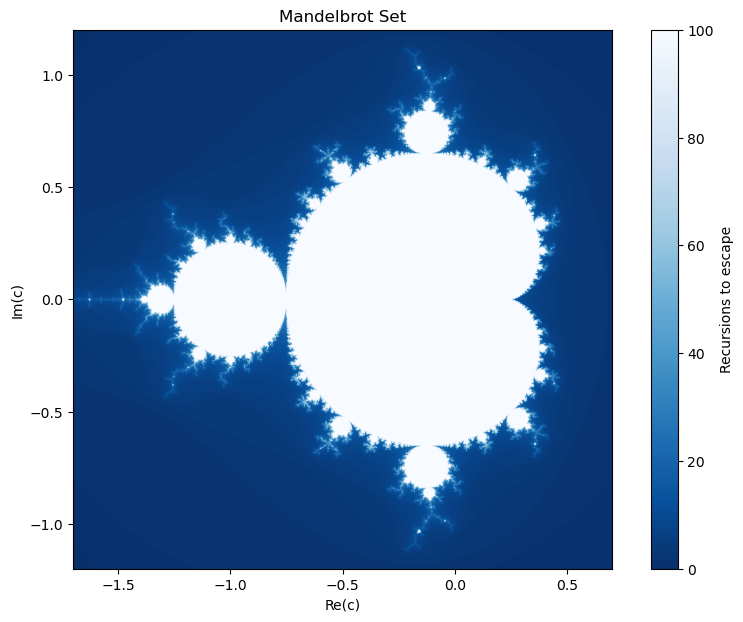

In [4]:
def plot_fractal(Z,x1,x2,y1,y2):
    plt.figure(figsize=(10,7))
    plt.imshow(Z,extent=(x1,x2,y1,y2),cmap='Blues_r',interpolation='bilinear')
    plt.colorbar(label='Recursions to escape')
    plt.title('Mandelbrot Set')
    plt.xlabel('Re(c)')
    plt.ylabel('Im(c)')
    plt.show()

max_iters=100
n=1000
x=np.linspace(-1.7,0.7,n)
y=np.linspace(-1.2,1.2,n)
plot_fractal(create_grid(x,y,max_iters),min(x),max(x),min(y),max(y))

### Random Sampling Methods

In [8]:
def area_estimate(x_range,y_range,x_samples,y_samples,max_iters,num_samples):
    mandelbrot_count = point_counter(x_samples, y_samples, max_iters)
    total_area = (x_range[1] - x_range[0]) * (y_range[1] - y_range[0])
    estimated_area = total_area * mandelbrot_count / num_samples
    return estimated_area

def PR_area_estimate(x_range, y_range, max_iters, num_samples):
    '''
    Estimates area of Mandelbrot set using Pure Random Sampling

    Args:
    x_range - range of the x coordinates
    y_range - range of the y coordinates
    max_recursion -  the number of times we want to observe the progression of the number
    num_samples - number of samples to be taken
    '''
    x_samples = np.random.uniform(x_range[0], x_range[1], num_samples)
    y_samples = np.random.uniform(y_range[0], y_range[1], num_samples)
    estimated_area=area_estimate(x_range,y_range,x_samples,y_samples,max_iters,num_samples)
    return estimated_area

def LHS_area_estimate(x_range, y_range, max_iters, num_samples):
    '''
    Estimates area of Mandelbrot set using Latin Hypercube sampling method

    Args:
    x_range - range of the x coordinates
    y_range - range of the y coordinates
    max_recursion -  the number of times we want to observe the progression of the number
    num_samples - number of samples to be taken
    '''
    sample_set = qmc.LatinHypercube(d=2)
    sample = sample_set.random(n=num_samples)

    x_samples = x_range[0] + sample[:, 0] * (x_range[1] - x_range[0])
    y_samples = y_range[0] + sample[:, 1] * (y_range[1] - y_range[0])

    estimated_area=area_estimate(x_range,y_range,x_samples,y_samples,max_iters,num_samples)
    return estimated_area

def ortho_area_estimate(x_range, y_range, max_iters, num_samples):
    '''
    TO DO: ADD DOCUMENTATION
    '''
    sample_size = int(np.sqrt(num_samples))

    sample_set = qmc.LatinHypercube(d=2)
    sample = sample_set.random(n=num_samples)

    x_size = np.linspace(x_range[0], x_range[1], sample_size + 1)
    y_size = np.linspace(y_range[0], y_range[1], sample_size + 1)

    x_samples = []
    y_samples = []

    for i in range(sample_size):
        for j in range(sample_size):
            # For each grid square, sample a random point within that section
            x_sample = np.random.uniform(x_size[i], x_size[i+1])
            y_sample = np.random.uniform(y_size[j], y_size[j+1])
            x_samples.append(x_sample)
            y_samples.append(y_sample)

    x_samples = np.array(x_samples)
    y_samples = np.array(y_samples)
    estimated_area=area_estimate(x_range,y_range,x_samples,y_samples,max_iters,num_samples)
    return estimated_area

In [6]:
def plot_areas(x_range, y_range, max_iters_list, n_list, sample_type):
    # Initialize library for area results
    area_results = {}
    variance_results = {}

    for max_iters in max_iters_list:
        # Initialize areas list and average area
        areas = []
        average_area = 0

        for n in n_list:
            # Calculates each estimated area for all samples and iterations
            if sample_type=="Pure Random":
                est_area = PR_area_estimate(x_range, y_range, max_iters, n)
            elif sample_type=="Latin Hypercube":
                est_area = LHS_area_estimate(x_range, y_range, max_iters, n)
            else:
                est_area = ortho_area_estimate(x_range, y_range, max_iters, n)
            areas.append(est_area)
        area_results[max_iters] = areas
        print(areas)
        print(area_results)

# Second Problem


In [ ]:
def error_analysis(x_range, y_range, max_iters, n_list, repetitions, col_idx):
    '''
    Error analysis with metrics and visualizations. Investigating
    the convergence of i and s.

    Args:
        x_range (tuple): (min_x, max_x) range for sampling
        y_range (tuple): (min_y, max_y) range for sampling
        max_iters (int): Maximum iterations of the number to test
        n_list (list): List of sample sizes to analyze
        repetitions (int): Number of times to repeat the MC
    '''

    iteration_errors = {}
    sampling_errors = {}
    convergence_rates = {}
    error_ratios = {}

    for n in n_list:  # For different sample sizes 
        estimates = np.zeros((repetitions, max_iters))
        for rep in range(repetitions):
            for j in range(max_iters):
                estimates[rep, j] = PR_area_estimate(x_range, y_range, max_iters, n)

        # Calculate errors
        iteration_errors[n] = np.abs(np.mean(estimates, axis=0) - np.mean(estimates[:, -1]))
        sampling_errors[n] = np.std(estimates, axis=0)

        # Calculate error ratio
        epsilon = 1e-10  # small number to avoid division by zero
        error_ratios[n] = iteration_errors[n][:-1] / (sampling_errors[n][:-1] + epsilon)

    # Create figure and grid specification
    fig = plt.figure(figsize=(15, 15))
    gs = fig.add_gridspec(3, 1, hspace=0.4)  # Adjust hspace for more space

    # Define axes for plotting
    axes = np.array([fig.add_subplot(gs[i, 0]) for i in range(3)])

    # List of plot data and configurations
    plot_data = [
        {'ax': axes[0], 'data': iteration_errors, 'ylabel': 'Iteration Error', 'title': f'Iteration Error (max_iters={max_iters})'},
        {'ax': axes[1], 'data': sampling_errors, 'ylabel': 'Sampling Error', 'title': f'Sampling Error (max_iters={max_iters})'},
        {'ax': axes[2], 'data': error_ratios, 'ylabel': 'Iteration Error / Sampling Error', 'title': f'Error Ratio (max_iters={max_iters})', 'axhline': True}
    ]

    # Loop through plot data for iteration, sampling, and error ratio
    for plot in plot_data:
        ax = plot['ax']
        data = plot['data']
        ylabel = plot['ylabel']
        title = plot['title']
        axhline = plot.get('axhline', False)

        # Plot the data for each sample size
        for n in n_list:
            if ylabel == 'Iteration Error':  # For Iteration Error, we exclude the last element for plotting
                ax.plot(np.arange(1, max_iters), data[n][:-1], label=f'Sample size = {n}')
            else:
                ax.plot(np.arange(1, max_iters), data[n], label=f'Sample size = {n}')

        ax.set_xlabel('Number of Iterations')
        ax.set_ylabel(ylabel)
        ax.set_title(title)
        ax.set_yscale('log')
        ax.set_xscale('log')
        ax.set_xticks([1, 10, 20, 50, 100, 200, 500])
        ax.set_xticklabels(['1', '10', '20', '50', '100', '200', '500'])

        if axhline:  # Add horizontal line only to the error ratio plot
            ax.axhline(y=1, color='k', linestyle='--', alpha=0.3)

        ax.legend()
        ax.grid(True)

    return iteration_errors, sampling_errors, error_ratios


In [7]:
# def error_analysis(x_range, y_range, max_iters, n_list, repetitions):
#     iteration_errors = {}
#     sampling_errors = {}
#     convergence_rates = {}
#     error_ratios = {}
#     for n in n_list: # For different sample sizes 
#         estimates = np.zeros((repetitions, max_iters))
#         # Gather estimates
#         for rep in range(repetitions):
#             for j in range(max_iters):
#                 estimates[rep, j] = PR_area_estimate(x_range, y_range, max_iters, n)
#     print(estimates)
x_range = (-2, 2)
y_range = (-2, 2)
max_iters_list = [50, 100, 200, 500]
n_list = [100, 500, 1000, 10000]
repetitions = 5
for max_iters in max_iters_list:
    error_analysis(x_range,y_range,max_iters,n_list,repetitions)

[[1.536  1.56   1.592  1.6288 1.5024 1.6864 1.6128 1.5696 1.5264 1.5136
  1.5616 1.5472 1.5888 1.608  1.5664 1.6864 1.5328 1.576  1.5328 1.6288
  1.6176 1.5808 1.552  1.5696 1.5888 1.5712 1.5776 1.5408 1.6688 1.5808
  1.536  1.5216 1.5072 1.5584 1.648  1.5536 1.5264 1.6112 1.6048 1.5648
  1.592  1.5936 1.56   1.5792 1.5408 1.56   1.6208 1.6176 1.5904 1.6432]
 [1.5888 1.5824 1.5664 1.5136 1.5232 1.5056 1.5936 1.592  1.6256 1.5952
  1.6368 1.5696 1.6288 1.632  1.6336 1.5536 1.5536 1.6544 1.5648 1.5488
  1.6224 1.6048 1.544  1.6144 1.6416 1.6528 1.488  1.6016 1.5696 1.5728
  1.4816 1.5296 1.6016 1.6    1.6736 1.5344 1.6368 1.52   1.5824 1.6752
  1.5536 1.5568 1.5456 1.624  1.5488 1.7008 1.5152 1.56   1.6112 1.5904]
 [1.5472 1.5616 1.6944 1.6112 1.56   1.6336 1.64   1.6096 1.5728 1.592
  1.5584 1.5312 1.584  1.5952 1.5984 1.5936 1.5392 1.5696 1.5936 1.6448
  1.5584 1.5728 1.5488 1.5888 1.6464 1.6432 1.5456 1.5728 1.544  1.7072
  1.6672 1.584  1.5296 1.5488 1.5936 1.552  1.544  1.6464 1.576


Analysis for max_iters = 50
Analysis Results:

Sample size n = 100:
Optimal iterations: 10
At optimal point:
  Iteration error: 0.576000
  Sampling error:  0.627069
  Error ratio:     0.919

Sample size n = 500:
Optimal iterations: 16
At optimal point:
  Iteration error: 0.185600
  Sampling error:  0.189206
  Error ratio:     0.981

Sample size n = 1000:
Optimal iterations: 27
At optimal point:
  Iteration error: 0.076800
  Sampling error:  0.077331
  Error ratio:     0.993

Sample size n = 10000:
Optimal iterations: 35
At optimal point:
  Iteration error: 0.045120
  Sampling error:  0.043087
  Error ratio:     1.047

Analysis for max_iters = 100
Analysis Results:

Sample size n = 100:
Optimal iterations: 10
At optimal point:
  Iteration error: 0.448000
  Sampling error:  0.445708
  Error ratio:     1.005

Sample size n = 500:
Optimal iterations: 24
At optimal point:
  Iteration error: 0.089600
  Sampling error:  0.093624
  Error ratio:     0.957

Sample size n = 1000:
Optimal iterati

<Figure size 2000x1500 with 0 Axes>

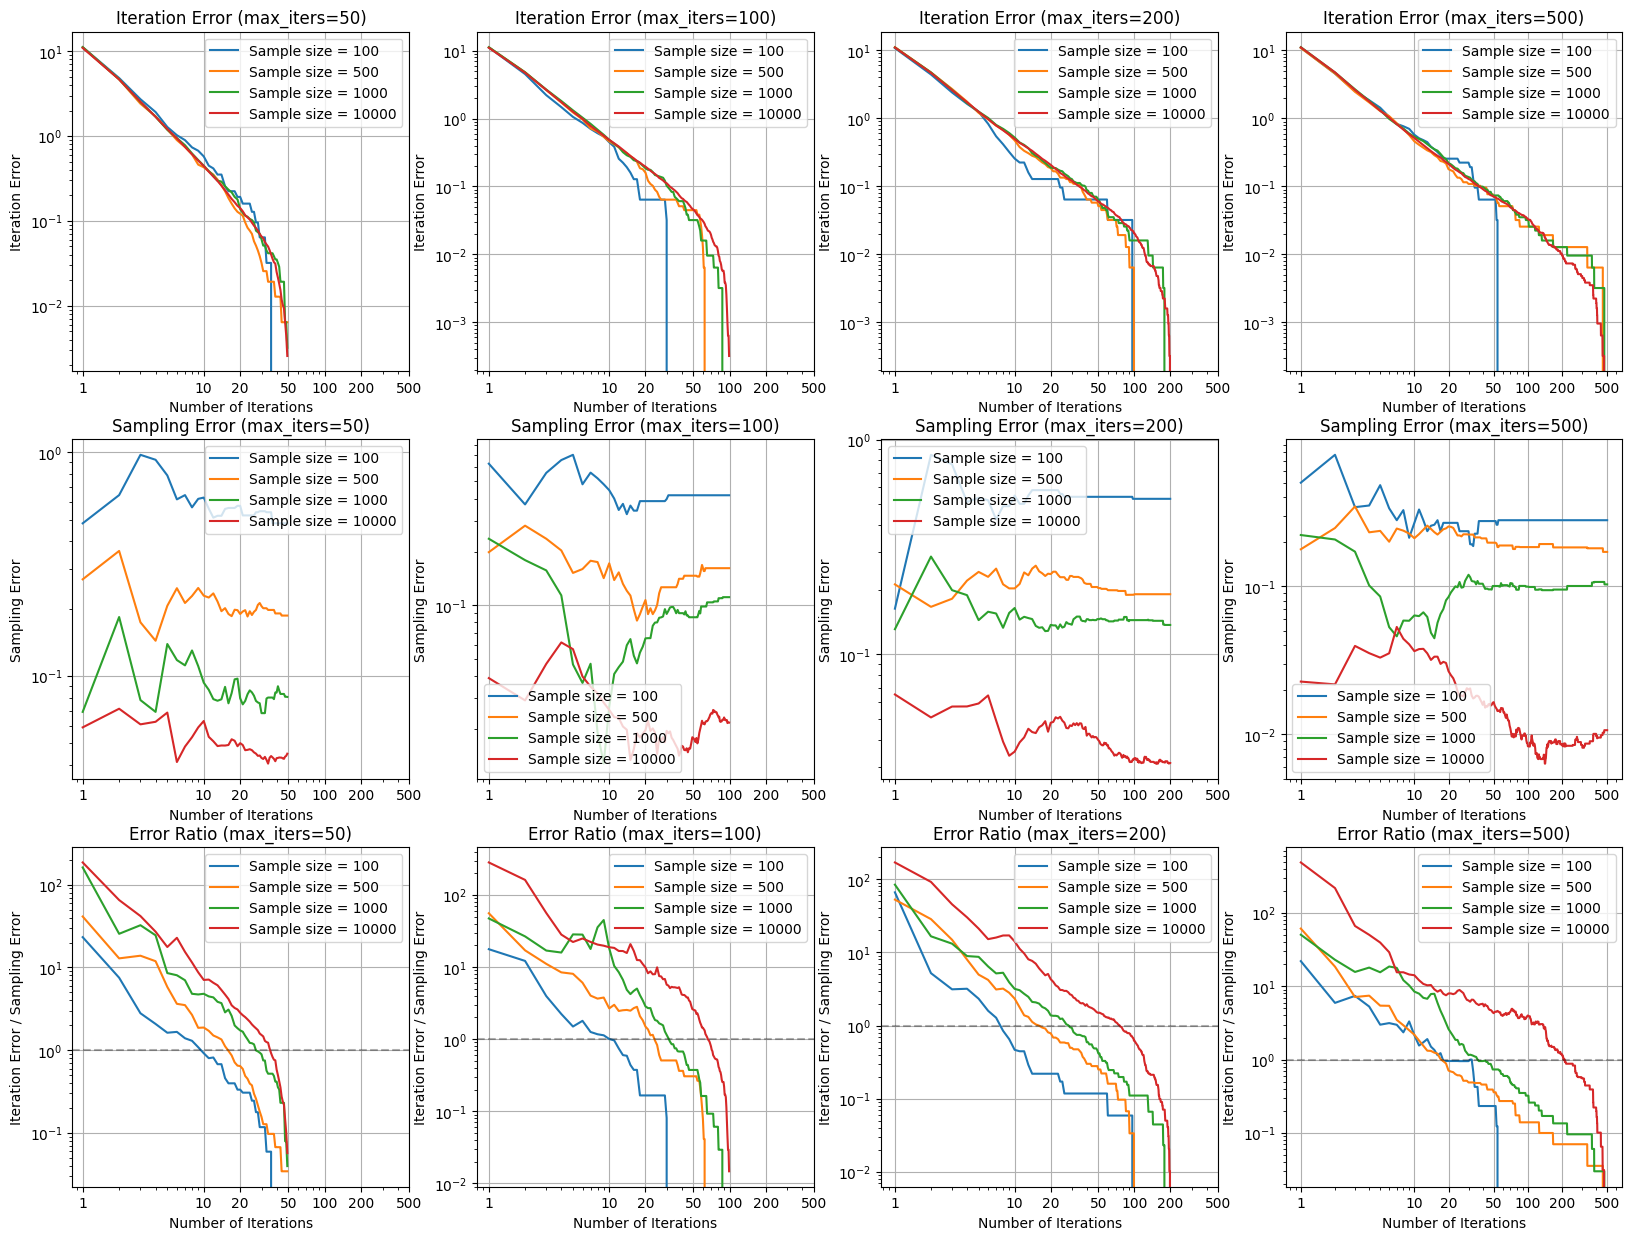

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

In [ ]:
#usage
x_range = (-2, 2)
y_range = (-2, 2)
max_iters_list = [50, 100, 200, 500]
n_list = [100, 500, 1000, 10000]
repetitions = 5

plt.figure(figsize=(20, 15))
# Create a 3x4 grid (3 rows for error types, 4 columns for different max_iters)
fig, axes = plt.subplots(3, len(max_iters_list), figsize=(20, 15))

# Run analysis for each max_iters
for idx, max_iters in enumerate(max_iters_list):
    print(f"\nAnalysis for max_iters = {max_iters}")
    iteration_errors, sampling_errors, error_ratios = error_analysis(
        x_range, y_range, max_iters, n_list, repetitions, idx)

    # Print analysis results
    print("Analysis Results:")
    print("================")
    for n in n_list:
        optimal_iter = np.argmin(np.abs(error_ratios[n] - 1)) + 1
        print(f"\nSample size n = {n}:")
        print(f"Optimal iterations: {optimal_iter}")
        print(f"At optimal point:")
        print(f"  Iteration error: {iteration_errors[n][optimal_iter-1]:.6f}")
        print(f"  Sampling error:  {sampling_errors[n][optimal_iter-1]:.6f}")
        print(f"  Error ratio:     {error_ratios[n][optimal_iter-1]:.3f}")

plt.tight_layout()
plt.show()

# Third Problem - Random Sampling

In [ ]:
def PR(x_range, y_range, max_recursion, num_samples):
    '''
    Estimates area of Mandelbrot set using Pure Random Sampling

    Args:
    x_range - range of the x coordinates
    y_range - range of the y coordinates
    max_recursion -  the number of times we want to observe the progression of the number
    num_samples - number of samples to be taken
    '''
    x_samples = np.random.uniform(x_range[0], x_range[1], num_samples)
    y_samples = np.random.uniform(y_range[0], y_range[1], num_samples)

    return x_samples, y_samples

def LHS(x_range, y_range, max_recursion, num_samples):
    '''
    Estimates area of Mandelbrot set using Latin Hypercube sampling method

    Args:
    x_range - range of the x coordinates
    y_range - range of the y coordinates
    max_recursion -  the number of times we want to observe the progression of the number
    num_samples - number of samples to be taken
    '''
    sample_set = qmc.LatinHypercube(d=2)
    sample = sample_set.random(n=num_samples)

    x_samples = x_range[0] + sample[:, 0] * (x_range[1] - x_range[0])
    y_samples = y_range[0] + sample[:, 1] * (y_range[1] - y_range[0])

    return x_samples, y_samples

KeyboardInterrupt: 

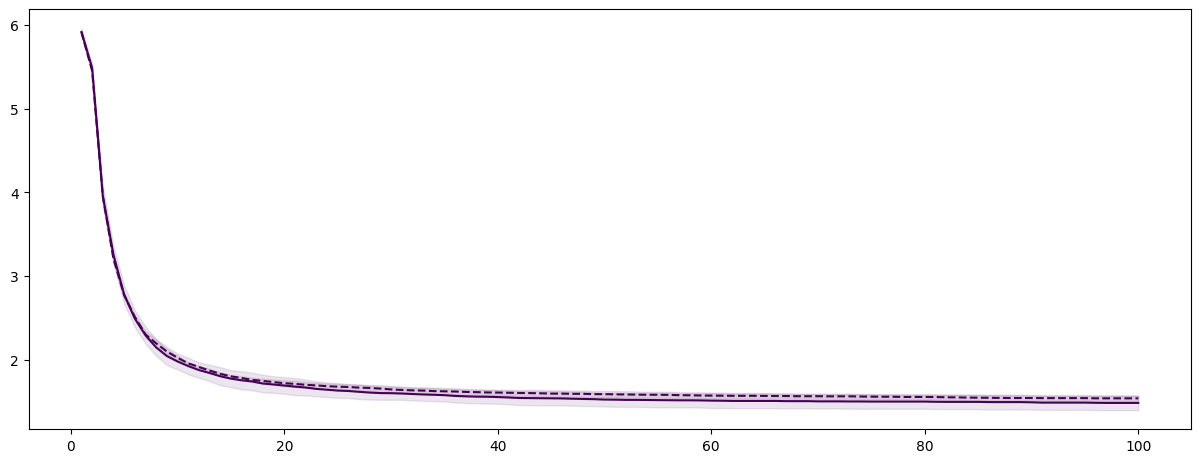

In [ ]:
def PR(x_range, y_range, max_recursion, num_samples):
    '''
    Estimates area of Mandelbrot set using Pure Random Sampling

    Args:
    x_range - range of the x coordinates
    y_range - range of the y coordinates
    max_recursion -  the number of times we want to observe the progression of the number
    num_samples - number of samples to be taken
    '''
    x_samples = np.random.uniform(x_range[0], x_range[1], num_samples)
    y_samples = np.random.uniform(y_range[0], y_range[1], num_samples)

    return x_samples, y_samples

def LHS(x_range, y_range, max_recursion, num_samples):
    '''
    Estimates area of Mandelbrot set using Latin Hypercube sampling method

    Args:
    x_range - range of the x coordinates
    y_range - range of the y coordinates
    max_recursion -  the number of times we want to observe the progression of the number
    num_samples - number of samples to be taken
    '''
    sample_set = qmc.LatinHypercube(d=2)
    sample = sample_set.random(n=num_samples)

    x_samples = x_range[0] + sample[:, 0] * (x_range[1] - x_range[0])
    y_samples = y_range[0] + sample[:, 1] * (y_range[1] - y_range[0])

    return x_samples, y_samples

def analyze_sampling_methods(x_range, y_range, n_list, max_iters, repetitions):
    """
    Compare how different sampling methods affect the Monte Carlo estimation
    """
    plt.figure(figsize=(15, 12))
    plt.subplot(2, 1, 1)

    # Dictionary to store results for each method
    methods_results = {
        'PR': {},
        'LHS': {}
    }

    # Colors for different sample sizes
    colors = plt.cm.viridis(np.linspace(0, 1, len(n_list)))

    for idx, n in enumerate(n_list):
        for method in ['PR', 'LHS']:
            estimates = np.zeros((repetitions, max_iters))
            area = (x_range[1] - x_range[0]) * (y_range[1] - y_range[0])

            # Gather estimates for each repetition
            for rep in range(repetitions):
                # Choose sampling method
                if method == 'PR':
                    x, y = PR(x_range, y_range, max_iters, n)
                else:
                    x, y = LHS(x_range, y_range, max_iters, n)

                # Calculate estimates for each iteration
                for j in range(max_iters):
                    count = sum(1 for x_i, y_i in zip(x, y)
                              if is_mandelbrot(complex(x_i, y_i), j + 1) == j + 1)
                    estimates[rep, j] = (count/n) * area

            # Store results
            methods_results[method][n] = estimates

            # Calculate statistics
            mean_estimates = np.mean(estimates, axis=0)
            std_estimates = np.std(estimates, axis=0)

            # Plot with error bands
            iterations = range(1, max_iters + 1)
            plt.plot(iterations, mean_estimates,
                    color=colors[idx],
                    linestyle='-' if method == 'PR' else '--',
                    label=f'{method}, n={n}')
            plt.fill_between(iterations,
                           mean_estimates - std_estimates,
                           mean_estimates + std_estimates,
                           color=colors[idx],
                           alpha=0.1)

    plt.xlabel('Iterations')
    plt.ylabel('Area Estimate')
    plt.title('Area Estimate Progression: PR vs LHS')
    plt.legend()
    plt.grid(True)

    # Plot 2: Relative error comparison
    plt.subplot(2, 1, 2)

    for idx, n in enumerate(n_list):
        for method in ['PR', 'LHS']:
            estimates = methods_results[method][n]
            mean_estimates = np.mean(estimates, axis=0)
            relative_changes = np.abs(np.diff(mean_estimates) / mean_estimates[:-1])

            plt.plot(range(1, max_iters), relative_changes,
                    color=colors[idx],
                    linestyle='-' if method == 'PR' else '--',
                    label=f'{method}, n={n}')

    plt.xlabel('Iterations')
    plt.ylabel('Relative Change')
    plt.title('Convergence Comparison: PR vs LHS')
    plt.yscale('log')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Print comparative analysis
    print("\nComparative Analysis Results:")
    print("============================")
    for n in n_list:
        print(f"\nSample size n = {n}:")
        for method in ['PR', 'LHS']:
            estimates = methods_results[method][n]
            mean_estimates = np.mean(estimates, axis=0)
            std_final = np.std(estimates[:, -1])
            relative_changes = np.abs(np.diff(mean_estimates) / mean_estimates[:-1])

            # Find convergence point
            convergence_point = np.where(relative_changes < 1e-4)[0]
            convergence_iter = convergence_point[0] if len(convergence_point) > 0 else max_iters

            print(f"\n{method} Method:")
            print(f"  Final area estimate: {mean_estimates[-1]:.6f} ± {std_final:.6f}")
            print(f"  Convergence iteration: {convergence_iter}")
            print(f"  Relative error at convergence: {relative_changes[convergence_iter-1]:.2e}")
            print(f"  Total change: {(mean_estimates[-1] - mean_estimates[0])/mean_estimates[0]*100:.2f}%")

# Example usage
x_range = (-2, 0.5)
y_range = (-1.25, 1.25)
n_list = [1000, 5000, 10000]
max_iters = 100
repetitions = 5

analyze_sampling_methods(x_range, y_range, n_list, max_iters, repetitions)

In [ ]:
# Run the analysis
analyze_progression(
    x_range=(-2, 2),
    y_range=(-2, 2),
    n_list=[100, 500, 1000],
    max_iters=100,
    repetitions=5
)